In [1]:
!pip install tensorflow-addons
!pip install medmnist

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.3 MB/s eta 0:00:00
Cloning into 'contrastive-classification-keras'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 138 (delta 70), reused 103 (delta 35), pack-reused 0
Receiving objects: 100% (138/138), 716.21 KiB | 6.17 MiB/s, done.
Resolving deltas: 100% (70/70), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=c7deb206d1d455982997e573bacbb08e26b5cd448bc425a72309e10c10625726
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Mounted at /content/drive


In [2]:
import sys
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# from dataset import prepare_dataset

from tensorflow.keras.models import Sequential, Model


import tensorflow_addons as tfa
import tensorflow as tf
print(tf.__version__)


import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import pandas as pd
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.metrics import *
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from matplotlib.colors import ListedColormap
from tensorflow.keras import backend as k
import datetime
# import tensorflow_hub as hub
import random
import os
from numpy import save
from numpy import load
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
# import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.metrics import confusion_matrix , accuracy_score , precision_score, recall_score, f1_score

from tensorflow.keras import regularizers
from tqdm import tqdm
import math
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tqdm import tqdm



import medmnist
from medmnist import INFO, Evaluator

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


2.15.0


In [7]:
NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001
input_shape = (96,96,3)

In [4]:
def process_image(image , IMG_SIZE = 96):


    image = tf.convert_to_tensor(image, dtype=tf.float32)

    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image


def get_image_label(image_path, label):

    image = process_image(image_path)
    return image, label





def med_mnist(data_flag,f = False, batch_size=64):

    # data_flag = 'dermamnist'
    # data_flag = 'breastmnist'
    download = True



    info = INFO[data_flag]
    task = info['task']
    n_channels = info['n_channels']
    n_classes = len(info['label'])

    DataClass = getattr(medmnist, info['python_class'])



    data_transform = transforms.Compose([
        transforms.ToTensor(),

    ])


    # load the data
    train_dataset = DataClass(split='train', transform=data_transform, download=download)
    test_dataset = DataClass(split='test', transform=data_transform, download=download)

    pil_dataset = DataClass(split='train', download=download)

    # encapsulate data into dataloader form
    train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
    test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

    print()
    print(train_dataset)
    print("===================")
    print(test_dataset)
    print()

    img = []
    labels = []

    for x, y in tqdm(train_dataset):

      x2 = x.numpy()

      x2  = np.transpose(x2, (1,2,0))

      img.append(x2)
      labels.append(y[0])


    for x,y in tqdm(test_dataset):

      x2 = x.numpy()
      x2  = np.transpose(x2, (1,2,0))

      img.append(x2)
      labels.append(y[0])





    img = np.array(img)

    temp = []

    if(f):

        for x in tqdm(img):

            backtorgb = cv2.cvtColor(x,cv2.COLOR_GRAY2RGB)

            temp.append(backtorgb)


        img = np.array(temp)


    labels = np.array(labels)

    labels_en = np.zeros((labels.size, labels.max()+1), dtype=int)


    labels_en[np.arange(labels.size),labels] = 1


    X_train, X_val_, y_train, y_val_ = train_test_split(img,
                                                      labels_en,
                                                      test_size=0.1,
                                                      random_state=42)






    X_val, X_test, y_val, y_test = train_test_split(X_val_,
                                                      y_val_,
                                                      test_size=0.1,
                                                      random_state=42)







    print()
    print()

    print("X_train ", X_train.shape)
    print("y_train ", y_train.shape)
    print("X_val ", X_val.shape)
    print("y_val ", y_val.shape)
    print("X_test ", X_test.shape)
    print("y_test ", y_test.shape)

    print()
    print()


    AUTO = tf.data.AUTOTUNE


    train_data = tf.data.Dataset.from_tensor_slices((tf.constant(X_train),
                                            tf.constant(y_train)))


    train_data = train_data.shuffle(buffer_size=len(X_train))


    train_data = train_data.map(get_image_label).batch(batch_size , drop_remainder=True)



    val_data = tf.data.Dataset.from_tensor_slices((tf.constant(X_val),
                                            tf.constant(y_val)))


    val_data = val_data.shuffle(buffer_size=len(X_val))


    val_data = val_data.map(get_image_label).batch(batch_size , drop_remainder=True)









    test_data = tf.data.Dataset.from_tensor_slices((tf.constant(X_test),
                                            tf.constant(y_test)))


    test_data = test_data.shuffle(buffer_size=len(X_test))


    test_data = test_data.map(get_image_label).batch(batch_size , drop_remainder=True)






    train_data = train_data.prefetch(buffer_size=AUTO)

    val_data = val_data.prefetch(buffer_size=AUTO)

    test_data = test_data.prefetch(buffer_size=AUTO)

    print()
    print()
    print("train_data: " , train_data)
    print()
    print("val_data : ", val_data )
    print()
    print("test_data: ", test_data)
    print()


    return (n_classes ,train_data, val_data , test_data )








def tsne_data(data_flag,batch_size= 64):

    # data_flag = 'dermamnist'
    # data_flag = 'breastmnist'
    download = True



    info = INFO[data_flag]
    task = info['task']
    n_channels = info['n_channels']
    n_classes = len(info['label'])

    DataClass = getattr(medmnist, info['python_class'])



    data_transform = transforms.Compose([
        transforms.ToTensor(),

    ])


    # load the data
    train_dataset = DataClass(split='train', transform=data_transform, download=download)
    test_dataset = DataClass(split='test', transform=data_transform, download=download)

    pil_dataset = DataClass(split='train', download=download)

    # encapsulate data into dataloader form
    train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
    test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

    print()
    print(train_dataset)
    print("===================")
    print(test_dataset)
    print()

    img = []
    labels = []

    for x, y in tqdm(train_dataset):

      x2 = x.numpy()

      x2  = np.transpose(x2, (1,2,0))

      img.append(x2)
      labels.append(y[0])


    for x,y in tqdm(test_dataset):

      x2 = x.numpy()
      x2  = np.transpose(x2, (1,2,0))

      img.append(x2)
      labels.append(y[0])





    img = np.array(img)

    temp = []



    labels = np.array(labels)

    # labels_en = np.zeros((labels.size, labels.max()+1), dtype=int)


    # labels_en[np.arange(labels.size),labels] = 1


    X_train, X_val_, y_train, y_val_ = train_test_split(img,
                                                      labels,
                                                      test_size=0.1,
                                                      random_state=42)






    X_val, X_test, y_val, y_test = train_test_split(X_val_,
                                                      y_val_,
                                                      test_size=0.1,
                                                      random_state=42)



    test_data = tf.data.Dataset.from_tensor_slices(tf.constant(X_test))




    test_data = test_data.map(process_image).batch(batch_size , drop_remainder=False)





    return (n_classes ,test_data , y_test)
















In [5]:
n_classes1, train1, val1, test1 = med_mnist("bloodmnist")

100%|██████████| 35461855/35461855 [00:02<00:00, 15523364.53it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set.

100%|██████████| 3421/3421 [00:00<00:00, 7212.47it/s]




X_train  (13842, 28, 28, 3)
y_train  (13842, 8)
X_val  (1384, 28, 28, 3)
y_val  (1384, 8)
X_test  (154, 28, 28, 3)
y_test  (154, 8)




train_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

val_data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

test_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>



In [8]:

class RandomResizedCrop(layers.Layer):
    def __init__(self, scale, ratio):
        super(RandomResizedCrop, self).__init__()
        self.scale = scale
        self.log_ratio = (tf.math.log(ratio[0]), tf.math.log(ratio[1]))

    def call(self, images):
        batch_size = tf.shape(images)[0]
        height = tf.shape(images)[1]
        PROJECT_DIM = tf.shape(images)[2]

        random_scales = tf.random.uniform((batch_size,), self.scale[0], self.scale[1])
        random_ratios = tf.exp(
            tf.random.uniform((batch_size,), self.log_ratio[0], self.log_ratio[1])
        )

        new_heights = tf.clip_by_value(tf.sqrt(random_scales / random_ratios), 0, 1)
        new_PROJECT_DIMs = tf.clip_by_value(tf.sqrt(random_scales * random_ratios), 0, 1)
        height_offsets = tf.random.uniform((batch_size,), 0, 1 - new_heights)
        PROJECT_DIM_offsets = tf.random.uniform((batch_size,), 0, 1 - new_PROJECT_DIMs)

        bounding_boxes = tf.stack(
            [
                height_offsets,
                PROJECT_DIM_offsets,
                height_offsets + new_heights,
                PROJECT_DIM_offsets + new_PROJECT_DIMs,
            ],
            axis=1,
        )
        images = tf.image.crop_and_resize(
            images, bounding_boxes, tf.range(batch_size), (height, PROJECT_DIM)
        )
        return images



class RandomBrightness(layers.Layer):
    def __init__(self, brightness):
        super(RandomBrightness, self).__init__()
        self.brightness = brightness

    def blend(self, images_1, images_2, ratios):
        return tf.clip_by_value(ratios * images_1 + (1.0 - ratios) * images_2, 0, 1)

    def random_brightness(self, images):
        # random interpolation/extrapolation between the image and darkness
        return self.blend(
            images,
            0,
            tf.random.uniform(
                (tf.shape(images)[0], 1, 1, 1), 1 - self.brightness, 1 + self.brightness
            ),
        )

    def call(self, images):
        images = self.random_brightness(images)
        return images

def augmenter(brightness, name, scale):
    return keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Rescaling(1 / 255),
            layers.RandomFlip("horizontal"),
            RandomResizedCrop(scale=scale, ratio=(3 / 4, 4 / 3)),
            RandomBrightness(brightness=brightness),
        ],
        name=name,
    )


def augmenter2( brightness, name, scale):
    return keras.Sequential(
        [
            layers.Input(shape=input_shape),
            layers.Rescaling(1 / 255),
            layers.RandomFlip("horizontal"),
            layers.RandomZoom(0.2),
            layers.RandomRotation(0.3),
            layers.RandomContrast(0.2),
            layers.RandomHeight(0.2),

            RandomResizedCrop(scale=scale, ratio=(3 / 4, 4 / 3)),
            RandomBrightness(brightness=brightness),
        ],
        name=name,
    )








In [9]:

l = 0.0001

epochs = 50

batch_size = 32



steps = epochs * (5000// batch_size)
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay(
initial_learning_rate= l , decay_steps=steps)

In [10]:



def get_encoder2():
    base_model = tf.keras.applications.ResNet50(include_top=False,
        weights="imagenet", input_shape=input_shape)
    base_model.trainable = True

    inputs = tf.keras.layers.Input(input_shape)
    x = base_model(inputs, training=True)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(2048, activation='relu', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    z = tf.keras.layers.Dense(2048)(x)

    f = tf.keras.Model(inputs, z)

    return f




In [11]:
paths = {"simclr": '/content/drive/MyDrive/self_supervised2/model_simclr_mark12_imgnet.h5',
         "nnclr" : '/content/drive/MyDrive/self_supervised2/model_nnclr_mark12_imgnet-v2.h5',
         "moco" : '/content/drive/MyDrive/self_supervised2/model_moco_mark-x_t-imgnet.h5',
         "dcclr" : '/content/drive/MyDrive/self_supervised2/model_dcclr_mark-x_t-imgnet.h5',
         "dino" : '/content/drive/MyDrive/self_supervised2/model_dino_mark12_imgnet.h5',
         "simsiam" : '/content/drive/MyDrive/self_supervised2/model_simsiam_mark12_imgnet.h5',
        "byol" :  '/content/drive/MyDrive/self_supervised2/model_byol_mark12_imgnet.h5',
        "pnnclr" :  "/content/drive/MyDrive/self_supervised2/model_NNCLR_WB_mark12_b_0.25_n_0.1_t2_0.8_imgnet.h5"
         }


In [12]:
n_classes1, _, val1, test1 = med_mnist("bloodmnist")
n_classes2, _, val2, test2 = med_mnist("pathmnist")
n_classes3, _, val3, test3 = med_mnist("tissuemnist")
n_classes4, _, val4, test4 = med_mnist("chestmnist")


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source da

100%|██████████| 3421/3421 [00:00<00:00, 7524.60it/s]




X_train  (13842, 28, 28, 3)
y_train  (13842, 8)
X_val  (1384, 28, 28, 3)
y_val  (1384, 8)
X_test  (154, 28, 28, 3)
y_test  (154, 8)




train_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

val_data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

test_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>



100%|██████████| 205615438/205615438 [00:09<00:00, 22434466.11it/s]


Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz

Dataset PathMNIST of size 28 (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tiss

100%|██████████| 7180/7180 [00:00<00:00, 7536.31it/s]




X_train  (87458, 28, 28, 3)
y_train  (87458, 9)
X_val  (8746, 28, 28, 3)
y_val  (8746, 9)
X_test  (972, 28, 28, 3)
y_test  (972, 9)




train_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>

val_data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>

test_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>



100%|██████████| 124962739/124962739 [00:06<00:00, 20051267.70it/s]


Using downloaded and verified file: /root/.medmnist/tissuemnist.npz
Using downloaded and verified file: /root/.medmnist/tissuemnist.npz

Dataset TissueMNIST of size 28 (tissuemnist)
    Number of datapoints: 165466
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is

100%|██████████| 47280/47280 [00:06<00:00, 7096.17it/s] 




X_train  (191471, 28, 28, 1)
y_train  (191471, 8)
X_val  (19147, 28, 28, 1)
y_val  (19147, 8)
X_test  (2128, 28, 28, 1)
y_test  (2128, 8)




train_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

val_data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

test_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>



100%|██████████| 82802576/82802576 [00:04<00:00, 19835893.19it/s]


Using downloaded and verified file: /root/.medmnist/chestmnist.npz
Using downloaded and verified file: /root/.medmnist/chestmnist.npz

Dataset ChestMNIST of size 28 (chestmnist)
    Number of datapoints: 78468
    Root location: /root/.medmnist
    Split: train
    Task: multi-label, binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'atelectasis', '1': 'cardiomegaly', '2': 'effusion', '3': 'infiltration', '4': 'mass', '5': 'nodule', '6': 'pneumonia', '7': 'pneumothorax', '8': 'consolidation', '9': 'edema', '10': 'emphysema', '11': 'fibrosis', '12': 'pleural', '13': 'hernia'}
    Number of samples: {'train': 78468, 'val': 11219, 'test': 22433}
    Description: The ChestMNIST is based on the NIH-ChestXray14 dataset, a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. We use the official data split, and resize the source images 

100%|██████████| 22433/22433 [00:02<00:00, 9608.30it/s]




X_train  (90810, 28, 28, 1)
y_train  (90810, 2)
X_val  (9081, 28, 28, 1)
y_val  (9081, 2)
X_test  (1010, 28, 28, 1)
y_test  (1010, 2)




train_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 2), dtype=tf.int64, name=None))>

val_data :  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 2), dtype=tf.int64, name=None))>

test_data:  <_PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 1), dtype=tf.float32, name=None), TensorSpec(shape=(64, 2), dtype=tf.int64, name=None))>



In [21]:

def evalute_method(model, val, test, n , l =  0.001,l1 =  0.001,epochs = 50 ,size = 32, input_shape = (96,96,3),r = False):





    print()
    print()
    print()
    print("______________________________")
    print("Hyper parameter...")
    print(" n = ", n , " l = ",  l," l1 = ", l1," epochs = ", epochs ," size = ", size, " input_shape = ", input_shape )
    print()
    print()
    print()
    print()


    finetuning_model = keras.Sequential(
        [
            layers.Input(shape=input_shape),
            augmenter( brightness = 0.2, name =  'contrastive_augmenter', scale =  (0.5, 1.0)),
            model,
            layers.Dense(n  ,activation = "softmax"),
        ],
        name="finetuning_model",
    )




    finetuning_model.compile(
        optimizer=keras.optimizers.Adam(l),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.CategoricalAccuracy(name="Accuracy") ,
                tfa.metrics.F1Score(num_classes = n ,  name='F1_score'),
                    tf.keras.metrics.Precision(name = "Precision"),
                    tfa.metrics.RSquare(name = "R2 score"),
                    tf.keras.metrics.Recall(name = "Recall"),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='Top 5 Accuracy'),
                    tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='Top 3 Accuracy')

                    ],
    )

    history = finetuning_model.fit(
        val, epochs=epochs, validation_data=test
    )



    # res = finetuning_model.evaluate(test)

    df = history.history

    avg_train_F1 = [ sum(i)/len(i) for i in  df["F1_score"]]
    avg_val_F1  = [ sum(i)/len(i) for i in  df["val_F1_score"]]

    df["F1_score"] = avg_train_F1
    df["val_F1_score"] = avg_val_F1

    if(r):

        return finetuning_model, df

    return df





In [28]:
C = ['red', 'blue', 'green', 'purple', 'orange', 'gray', 'pink', 'cyan', 'magenta', 'brown', 'olive', 'teal', 'lime', 'navy', 'violet']

def main2(name,f= False):

    base = os.path.join("/content/drive/MyDrive/self_supervised2/Results/tsne", name )
    base2 = os.path.join("/content/drive/MyDrive/self_supervised2/Results/Loss_Accuracy_graphs", name )



    print()
    print()
    print()
    print()
    print()
    print()


    n_classes, _, val, test = med_mnist(name,f)
    _, X, y = tsne_data(name)

    print()
    print()
    print()
    print()
    print()
    print()


    for i,j in paths.items():



        try:

                print("________________________________________________________________________")
                print()
                print()
                print(i)
                print()
                print()

                model_nn7 =  get_encoder2()


                model_nn7.load_weights(j)

                rn50_nn7 = tf.keras.Model(model_nn7.input, model_nn7.layers[2].output)

                rn50_nn7.trainable = False


                res = {}

                model,a = evalute_method(rn50_nn7, val, test ,n_classes, epochs = 30,r = True)

                df = pd.DataFrame(a)

                target_path = os.path.join(base, i + ".xlsx" )

                df.to_excel(target_path, index = False)

                if(f == False):

                    features = model.predict(X)


                    tsne =  TSNE(n_components=2).fit_transform(features)

                    tx, ty = tsne[:,0], tsne[:,1]
                    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
                    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

                    # df = pd.DataFrame(a)

                    colors = ListedColormap( C[:n_classes])

                    #create scatterplot
                    scatter = plt.scatter(tx, ty, c=y,s=25, cmap=colors)

                    #add legend with values
                    plt.legend(*scatter.legend_elements(),bbox_to_anchor = (1.25, 0.6), loc='center right')
                    plt.tight_layout()


                    target_path = os.path.join(base, i + ".pdf" )

                    print(target_path)

                    plt.savefig(target_path, format="pdf")

                    plt.show()



                print()
                print()




        except Exception as e:

            print(e)









Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset

100%|██████████| 3421/3421 [00:00<00:00, 3795.77it/s]




X_train  (13842, 28, 28, 3)
y_train  (13842, 8)
X_val  (1384, 28, 28, 3)
y_val  (1384, 8)
X_test  (154, 28, 28, 3)
y_test  (154, 8)




train_data:  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

val_data :  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

test_data:  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 8), dtype=tf.int64, name=None))>

Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz

Dataset BloodMNIST (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Me

100%|██████████| 3421/3421 [00:00<00:00, 8716.85it/s]








________________________________________________________________________


simclr





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 8s 226ms/step - loss: 1.8679 - Accuracy: 0.3281 - F1_score: 0.2604 - Precision: 0.5897 - R2 score: 0.0581 - Recall: 0.0513 - Top 5 Accuracy: 0.8348 - Top 3 Accuracy: 0.6525 - val_loss: 1.4729 - val_Accuracy: 0.4922 - val_F1_score: 0.4002 - val_Precision: 0.8800 - val_R2 score: 0.1977 - val_Recall: 0.1719 - val_Top 5 Accuracy: 0.9062 - val_Top 3 Accuracy: 0.7891
Epoch 2/30
21/21 [==============================] - 3s 121ms/step - loss: 1.2958 - Accuracy: 0.5521 - F1_score: 0.4979 - Precision: 0.7621 - R2 score: 0.2699 - Recall: 0.2455 - Top 5 Accuracy: 0.9516 - Top 3 Accuracy: 0.8356 - val_loss: 1.2441 - val_Accuracy: 0.4844 - val_F1_score: 0.4231 - val_Precision: 0.7708 - val_R2 score: 0.2788 - val_Recall: 0.2891 - val_Top 5 Accuracy: 0.9844 - val_Top 3 Accuracy: 0.8750
Epoch 3/30
21/21 [==============================] - 2s 84ms/step - loss: 1.1058 - Accuracy: 0.6168 - F1_score: 0.5770 - Precision: 0.8212 - R2 score: 0.3605 - Recall: 0.3624 - Top

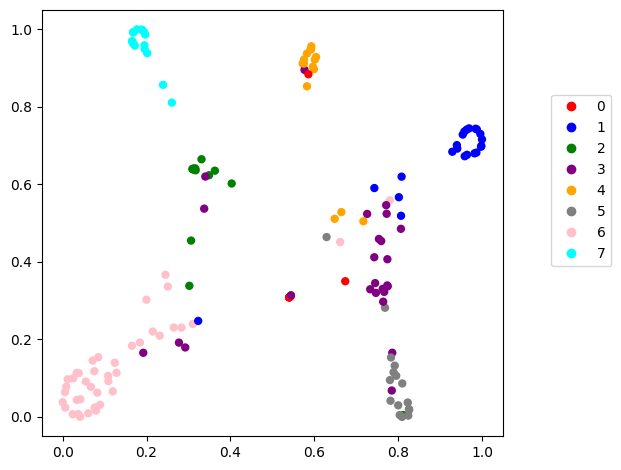



________________________________________________________________________


nnclr





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 8s 191ms/step - loss: 1.7270 - Accuracy: 0.3690 - F1_score: 0.3279 - Precision: 0.5677 - R2 score: 0.1063 - Recall: 0.1466 - Top 5 Accuracy: 0.8772 - Top 3 Accuracy: 0.7009 - val_loss: 1.3942 - val_Accuracy: 0.5234 - val_F1_score: 0.4923 - val_Precision: 0.7209 - val_R2 score: 0.2510 - val_Recall: 0.2422 - val_Top 5 Accuracy: 0.9375 - val_Top 3 Accuracy: 0.8281
Epoch 2/30
21/21 [==============================] - 3s 136ms/step - loss: 1.2164 - Accuracy: 0.5528 - F1_score: 0.4993 - Precision: 0.7820 - R2 score: 0.3017 - Recall: 0.3095 - Top 5 Accuracy: 0.9613 - Top 3 Accuracy: 0.8460 - val_loss: 1.1716 - val_Accuracy: 0.5859 - val_F1_score: 0.5574 - val_Precision: 0.7241 - val_R2 score: 0.3316 - val_Recall: 0.3281 - val_Top 5 Accuracy: 0.9609 - val_Top 3 Accuracy: 0.8906
Epoch 3/30
21/21 [==============================] - 2s 83ms/step - loss: 1.0747 - Accuracy: 0.6153 - F1_score: 0.5673 - Precision: 0.7947 - R2 score: 0.3683 - Recall: 0.4003 - Top

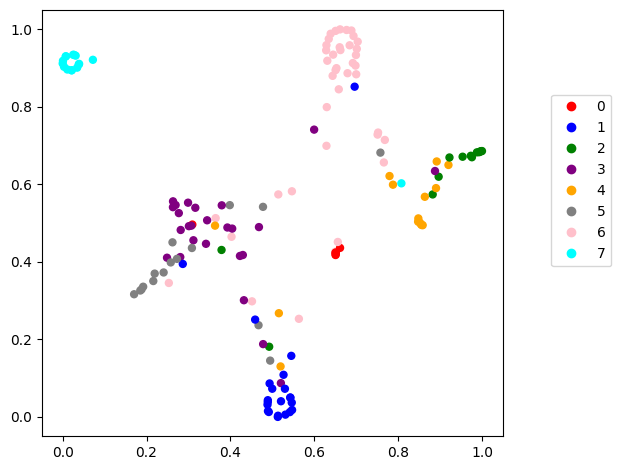



________________________________________________________________________


moco





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 9s 226ms/step - loss: 1.9354 - Accuracy: 0.2790 - F1_score: 0.2338 - Precision: 0.5641 - R2 score: 0.0251 - Recall: 0.0164 - Top 5 Accuracy: 0.8013 - Top 3 Accuracy: 0.6146 - val_loss: 1.5055 - val_Accuracy: 0.4688 - val_F1_score: 0.4153 - val_Precision: 1.0000 - val_R2 score: 0.1858 - val_Recall: 0.0469 - val_Top 5 Accuracy: 0.9219 - val_Top 3 Accuracy: 0.8047
Epoch 2/30
21/21 [==============================] - 2s 85ms/step - loss: 1.3707 - Accuracy: 0.5320 - F1_score: 0.4516 - Precision: 0.9299 - R2 score: 0.2362 - Recall: 0.1481 - Top 5 Accuracy: 0.9554 - Top 3 Accuracy: 0.8356 - val_loss: 1.1674 - val_Accuracy: 0.6328 - val_F1_score: 0.5956 - val_Precision: 1.0000 - val_R2 score: 0.3344 - val_Recall: 0.2266 - val_Top 5 Accuracy: 0.9766 - val_Top 3 Accuracy: 0.9375
Epoch 3/30
21/21 [==============================] - 2s 84ms/step - loss: 1.1671 - Accuracy: 0.6034 - F1_score: 0.5366 - Precision: 0.8922 - R2 score: 0.3281 - Recall: 0.2649 - Top 

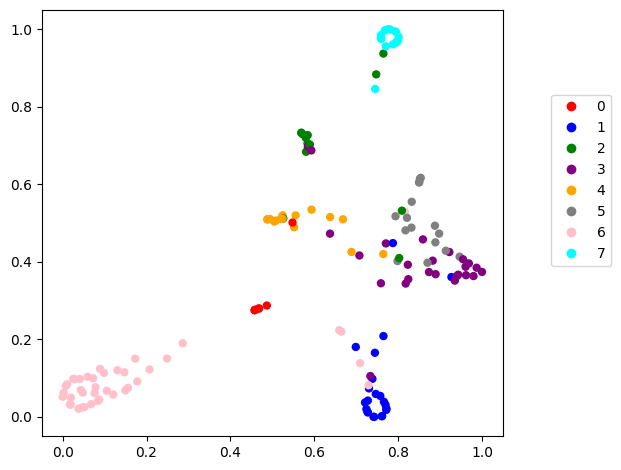



________________________________________________________________________


dcclr





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 11s 279ms/step - loss: 1.8057 - Accuracy: 0.3512 - F1_score: 0.2965 - Precision: 0.5435 - R2 score: 0.0801 - Recall: 0.1302 - Top 5 Accuracy: 0.8690 - Top 3 Accuracy: 0.6629 - val_loss: 1.2060 - val_Accuracy: 0.6094 - val_F1_score: 0.5463 - val_Precision: 0.8182 - val_R2 score: 0.3161 - val_Recall: 0.2812 - val_Top 5 Accuracy: 0.9688 - val_Top 3 Accuracy: 0.8438
Epoch 2/30
21/21 [==============================] - 2s 85ms/step - loss: 1.2040 - Accuracy: 0.5551 - F1_score: 0.5079 - Precision: 0.7605 - R2 score: 0.3066 - Recall: 0.2954 - Top 5 Accuracy: 0.9665 - Top 3 Accuracy: 0.8765 - val_loss: 1.0943 - val_Accuracy: 0.5938 - val_F1_score: 0.5722 - val_Precision: 0.8704 - val_R2 score: 0.3804 - val_Recall: 0.3672 - val_Top 5 Accuracy: 0.9844 - val_Top 3 Accuracy: 0.8828
Epoch 3/30
21/21 [==============================] - 2s 83ms/step - loss: 1.0417 - Accuracy: 0.6228 - F1_score: 0.5866 - Precision: 0.8147 - R2 score: 0.3888 - Recall: 0.4122 - Top

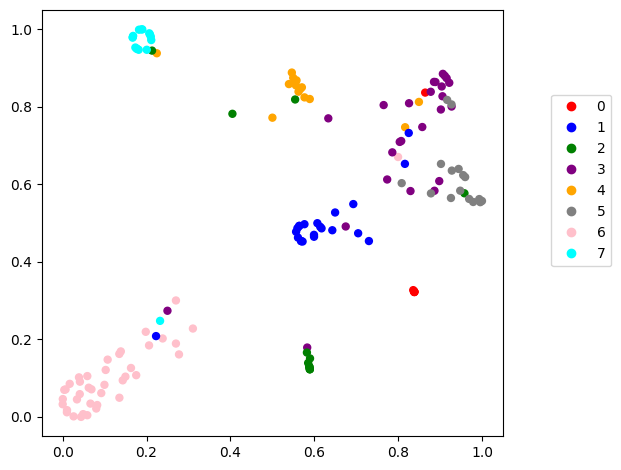



________________________________________________________________________


dino





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 9s 228ms/step - loss: 1.7802 - Accuracy: 0.3624 - F1_score: 0.2623 - Precision: 0.8955 - R2 score: 0.0779 - Recall: 0.0446 - Top 5 Accuracy: 0.8296 - Top 3 Accuracy: 0.6689 - val_loss: 1.5285 - val_Accuracy: 0.4297 - val_F1_score: 0.2742 - val_Precision: 0.8571 - val_R2 score: 0.1694 - val_Recall: 0.0938 - val_Top 5 Accuracy: 0.8984 - val_Top 3 Accuracy: 0.7812
Epoch 2/30
21/21 [==============================] - 2s 85ms/step - loss: 1.4308 - Accuracy: 0.4978 - F1_score: 0.3512 - Precision: 0.8381 - R2 score: 0.2024 - Recall: 0.1540 - Top 5 Accuracy: 0.9435 - Top 3 Accuracy: 0.8021 - val_loss: 1.4132 - val_Accuracy: 0.5000 - val_F1_score: 0.4149 - val_Precision: 0.7143 - val_R2 score: 0.2311 - val_Recall: 0.1172 - val_Top 5 Accuracy: 0.9375 - val_Top 3 Accuracy: 0.8125
Epoch 3/30
21/21 [==============================] - 2s 85ms/step - loss: 1.2946 - Accuracy: 0.5402 - F1_score: 0.4063 - Precision: 0.8235 - R2 score: 0.2577 - Recall: 0.2188 - Top 

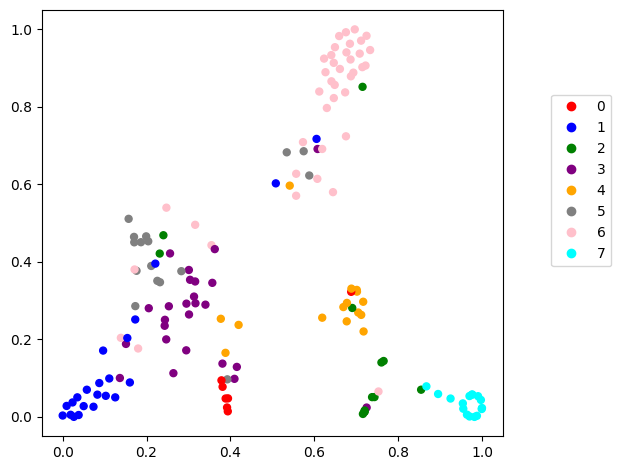



________________________________________________________________________


simsiam





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 8s 182ms/step - loss: 1.8772 - Accuracy: 0.2902 - F1_score: 0.1890 - Precision: 0.8837 - R2 score: 0.0450 - Recall: 0.0283 - Top 5 Accuracy: 0.8356 - Top 3 Accuracy: 0.6176 - val_loss: 1.6745 - val_Accuracy: 0.3594 - val_F1_score: 0.2554 - val_Precision: 0.8333 - val_R2 score: 0.1007 - val_Recall: 0.0391 - val_Top 5 Accuracy: 0.9297 - val_Top 3 Accuracy: 0.7109
Epoch 2/30
21/21 [==============================] - 3s 142ms/step - loss: 1.4694 - Accuracy: 0.4606 - F1_score: 0.3479 - Precision: 0.8636 - R2 score: 0.1880 - Recall: 0.1272 - Top 5 Accuracy: 0.9435 - Top 3 Accuracy: 0.7894 - val_loss: 1.4098 - val_Accuracy: 0.4453 - val_F1_score: 0.2987 - val_Precision: 0.7727 - val_R2 score: 0.1875 - val_Recall: 0.1328 - val_Top 5 Accuracy: 0.9453 - val_Top 3 Accuracy: 0.8594
Epoch 3/30
21/21 [==============================] - 2s 89ms/step - loss: 1.3221 - Accuracy: 0.5231 - F1_score: 0.4201 - Precision: 0.7885 - R2 score: 0.2469 - Recall: 0.1942 - Top

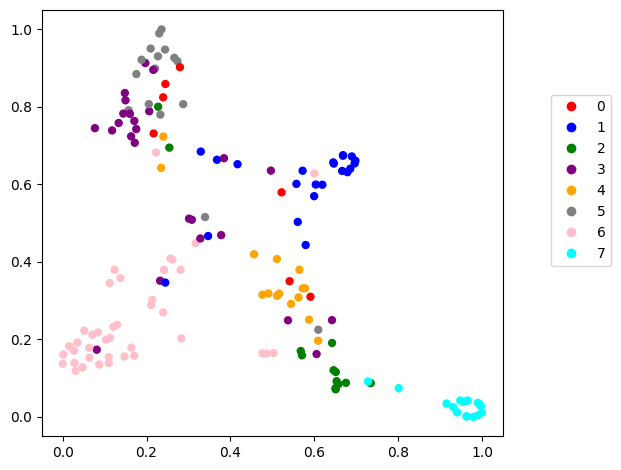



________________________________________________________________________


byol





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 7s 170ms/step - loss: 2.0522 - Accuracy: 0.2649 - F1_score: 0.2334 - Precision: 0.3222 - R2 score: -0.0159 - Recall: 0.0863 - Top 5 Accuracy: 0.8378 - Top 3 Accuracy: 0.5848 - val_loss: 1.5979 - val_Accuracy: 0.4609 - val_F1_score: 0.4006 - val_Precision: 0.6857 - val_R2 score: 0.1639 - val_Recall: 0.1875 - val_Top 5 Accuracy: 0.9297 - val_Top 3 Accuracy: 0.7266
Epoch 2/30
21/21 [==============================] - 3s 143ms/step - loss: 1.4016 - Accuracy: 0.4754 - F1_score: 0.4318 - Precision: 0.6939 - R2 score: 0.2166 - Recall: 0.2277 - Top 5 Accuracy: 0.9524 - Top 3 Accuracy: 0.8185 - val_loss: 1.1797 - val_Accuracy: 0.5625 - val_F1_score: 0.5160 - val_Precision: 0.9020 - val_R2 score: 0.3391 - val_Recall: 0.3594 - val_Top 5 Accuracy: 0.9766 - val_Top 3 Accuracy: 0.8672
Epoch 3/30
21/21 [==============================] - 2s 92ms/step - loss: 1.1676 - Accuracy: 0.5714 - F1_score: 0.5222 - Precision: 0.7890 - R2 score: 0.3238 - Recall: 0.3534 - To

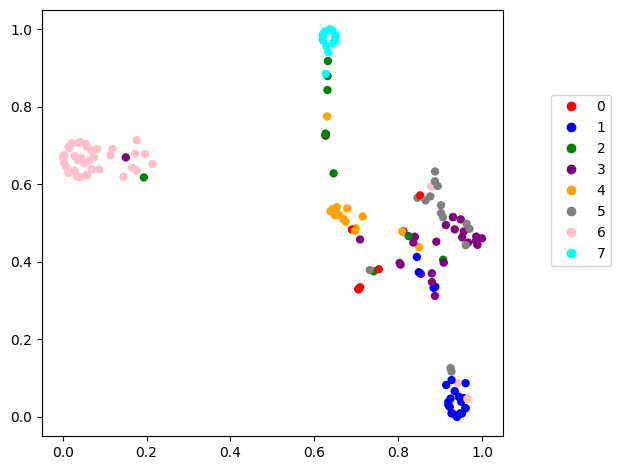



________________________________________________________________________


pnnclr





______________________________
Hyper parameter...
 n =  8  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


21/21 [==============================] - 7s 179ms/step - loss: 1.8269 - Accuracy: 0.3609 - F1_score: 0.2981 - Precision: 0.5385 - R2 score: 0.0779 - Recall: 0.1302 - Top 5 Accuracy: 0.8199 - Top 3 Accuracy: 0.6548 - val_loss: 1.3504 - val_Accuracy: 0.5000 - val_F1_score: 0.4681 - val_Precision: 0.7931 - val_R2 score: 0.2319 - val_Recall: 0.1797 - val_Top 5 Accuracy: 0.9609 - val_Top 3 Accuracy: 0.8281
Epoch 2/30
21/21 [==============================] - 3s 149ms/step - loss: 1.1834 - Accuracy: 0.5677 - F1_score: 0.5370 - Precision: 0.8088 - R2 score: 0.3271 - Recall: 0.3400 - Top 5 Accuracy: 0.9673 - Top 3 Accuracy: 0.8690 - val_loss: 1.0024 - val_Accuracy: 0.6484 - val_F1_score: 0.5820 - val_Precision: 0.8769 - val_R2 score: 0.4142 - val_Recall: 0.4453 - val_Top 5 Accuracy: 0.9922 - val_Top 3 Accuracy: 0.8594
Epoch 3/30
21/21 [==============================] - 3s 125ms/step - loss: 0.9766 - Accuracy: 0.6600 - F1_score: 0.6266 - Precision: 0.8418 - R2 score: 0.4333 - Recall: 0.4673 - To

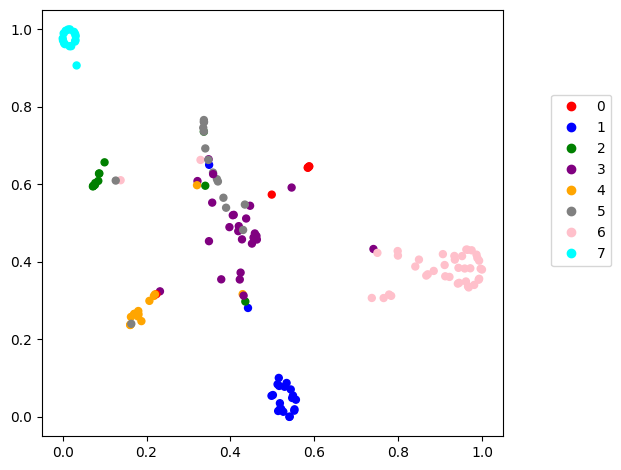

In [ ]:
main2("bloodmnist")







Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz

Dataset PathMNIST (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'adipose', '1': 'background', '2': 'debris', '3': 'lymphocytes', '4': 'mucus', '5': 'smooth muscle', '6': 'normal colon mucosa', '7': 'cancer-associated stroma', '8': 'colorectal adenocarcinoma epithelium'}
    Number of samples: {'train': 89996, 'val': 10004, 'test': 7180}
    Description: The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different

100%|██████████| 7180/7180 [00:01<00:00, 5534.83it/s]




X_train  (87458, 28, 28, 3)
y_train  (87458, 9)
X_val  (8746, 28, 28, 3)
y_val  (8746, 9)
X_test  (972, 28, 28, 3)
y_test  (972, 9)




train_data:  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>

val_data :  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>

test_data:  <PrefetchDataset element_spec=(TensorSpec(shape=(64, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(64, 9), dtype=tf.int64, name=None))>

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz

Dataset PathMNIST (pathmnist)
    Number of datapoints: 89996
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning

100%|██████████| 7180/7180 [00:00<00:00, 7628.88it/s]








________________________________________________________________________


simclr





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30
136/136 [==============================] - 19s 110ms/step - loss: 0.9927 - Accuracy: 0.6604 - F1_score: 0.6537 - Precision: 0.8314 - R2 score: 0.4871 - Recall: 0.5047 - Top 5 Accuracy: 0.9547 - Top 3 Accuracy: 0.8898 - val_loss: 0.6918 - val_Accuracy: 0.7490 - val_F1_score: 0.7576 - val_Precision: 0.8242 - val_R2 score: 0.6129 - val_Recall: 0.6396 - val_Top 5 Accuracy: 0.9969 - val_Top 3 Accuracy: 0.9698
Epoch 2/30
136/136 [==============================] - 17s 122ms/step - loss: 0.6061 - Accuracy: 0.7896 - F1_score: 0.7848 - Precision: 0.8644 - R2 score: 0.6597 - Recall: 0.6997 - Top 5 Accuracy: 0.9946 - Top 3 Accuracy: 0.9658 - val_loss: 0.5790 - val_Accuracy: 0.7875 - val_F1_score: 0.7905 - val_Precision: 0.8695 - val_R2 score: 0.6756 - val_R

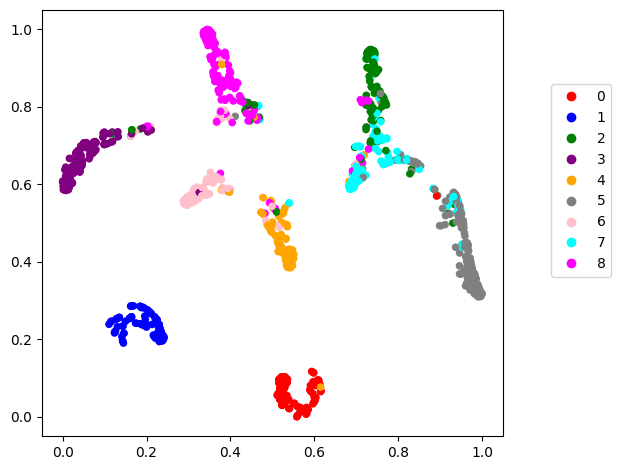



________________________________________________________________________


nnclr





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 18s 102ms/step - loss: 1.0502 - Accuracy: 0.6326 - F1_score: 0.6193 - Precision: 0.8180 - R2 score: 0.4490 - Recall: 0.4478 - Top 5 Accuracy: 0.9607 - Top 3 Accuracy: 0.8840 - val_loss: 0.7837 - val_Accuracy: 0.7271 - val_F1_score: 0.7111 - val_Precision: 0.8388 - val_R2 score: 0.5727 - val_Recall: 0.6073 - val_Top 5 Accuracy: 0.9917 - val_Top 3 Accuracy: 0.9448
Epoch 2/30
136/136 [==============================] - 14s 102ms/step - loss: 0.7298 - Accuracy: 0.7415 - F1_score: 0.7312 - Precision: 0.8418 - R2 score: 0.5897 - Recall: 0.6260 - Top 5 Accuracy: 0.9913 - Top 3 Accuracy: 0.9465 - val_loss: 0.6947 - val_Accuracy: 0.7615 - val_F1_score: 0.7640 - val_Precision: 0.8460 - val_R2 score: 0.6102 - val_Recall: 0.6469 - val_Top 5 Accuracy: 0.9937 - val_Top 3 Accuracy: 0.9594
Epoch 3/30
136/136 [==============================] - 14s 101ms/step - loss: 0.6655 - Accuracy: 0.7594 - F1_score: 0.7520 - Precision: 0.8477 - R2 score: 0.6193 - Recall: 0.

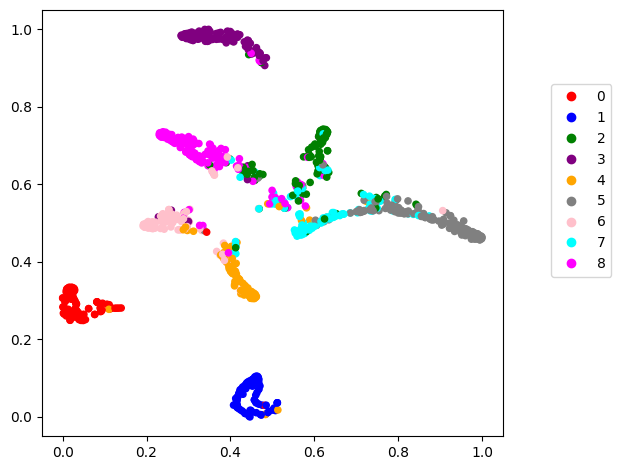



________________________________________________________________________


moco





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 19s 114ms/step - loss: 0.9729 - Accuracy: 0.6592 - F1_score: 0.6522 - Precision: 0.8577 - R2 score: 0.4859 - Recall: 0.4700 - Top 5 Accuracy: 0.9671 - Top 3 Accuracy: 0.8994 - val_loss: 0.7384 - val_Accuracy: 0.7385 - val_F1_score: 0.7394 - val_Precision: 0.8489 - val_R2 score: 0.5969 - val_Recall: 0.6146 - val_Top 5 Accuracy: 0.9927 - val_Top 3 Accuracy: 0.9469
Epoch 2/30
136/136 [==============================] - 14s 102ms/step - loss: 0.6532 - Accuracy: 0.7749 - F1_score: 0.7683 - Precision: 0.8687 - R2 score: 0.6342 - Recall: 0.6628 - Top 5 Accuracy: 0.9939 - Top 3 Accuracy: 0.9601 - val_loss: 0.6235 - val_Accuracy: 0.7729 - val_F1_score: 0.7776 - val_Precision: 0.8655 - val_R2 score: 0.6538 - val_Recall: 0.6771 - val_Top 5 Accuracy: 0.9937 - val_Top 3 Accuracy: 0.9646
Epoch 3/30
136/136 [==============================] - 13s 92ms/step - loss: 0.5796 - Accuracy: 0.7963 - F1_score: 0.7913 - Precision: 0.8773 - R2 score: 0.6726 - Recall: 0.7

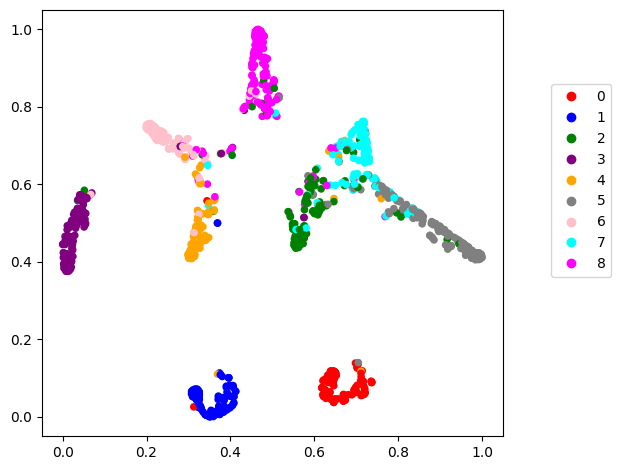



________________________________________________________________________


dcclr





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 20s 117ms/step - loss: 0.9523 - Accuracy: 0.6643 - F1_score: 0.6596 - Precision: 0.8084 - R2 score: 0.4999 - Recall: 0.5244 - Top 5 Accuracy: 0.9669 - Top 3 Accuracy: 0.9023 - val_loss: 0.6946 - val_Accuracy: 0.7271 - val_F1_score: 0.7341 - val_Precision: 0.8429 - val_R2 score: 0.6098 - val_Recall: 0.6427 - val_Top 5 Accuracy: 0.9906 - val_Top 3 Accuracy: 0.9583
Epoch 2/30
136/136 [==============================] - 14s 102ms/step - loss: 0.6172 - Accuracy: 0.7762 - F1_score: 0.7707 - Precision: 0.8653 - R2 score: 0.6494 - Recall: 0.6880 - Top 5 Accuracy: 0.9947 - Top 3 Accuracy: 0.9613 - val_loss: 0.6087 - val_Accuracy: 0.7885 - val_F1_score: 0.7842 - val_Precision: 0.8564 - val_R2 score: 0.6602 - val_Recall: 0.7083 - val_Top 5 Accuracy: 0.9958 - val_Top 3 Accuracy: 0.9677
Epoch 3/30
136/136 [==============================] - 14s 102ms/step - loss: 0.5562 - Accuracy: 0.7994 - F1_score: 0.7945 - Precision: 0.8699 - R2 score: 0.6807 - Recall: 0.

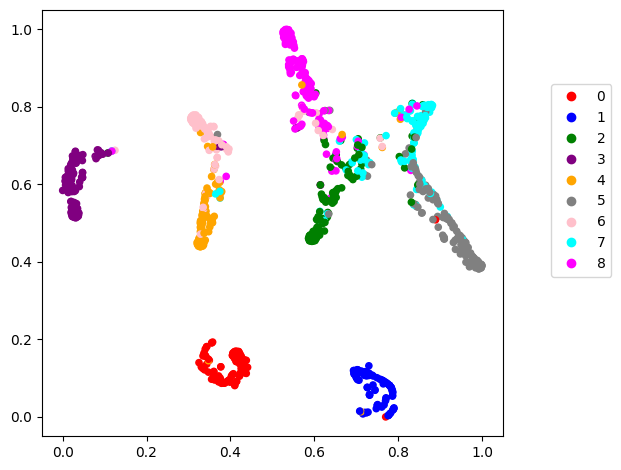



________________________________________________________________________


dino





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 19s 110ms/step - loss: 1.3430 - Accuracy: 0.5099 - F1_score: 0.4951 - Precision: 0.8448 - R2 score: 0.3132 - Recall: 0.2457 - Top 5 Accuracy: 0.9351 - Top 3 Accuracy: 0.8103 - val_loss: 1.1290 - val_Accuracy: 0.5906 - val_F1_score: 0.5886 - val_Precision: 0.8685 - val_R2 score: 0.4063 - val_Recall: 0.2958 - val_Top 5 Accuracy: 0.9708 - val_Top 3 Accuracy: 0.8854
Epoch 2/30
136/136 [==============================] - 14s 99ms/step - loss: 1.0628 - Accuracy: 0.6162 - F1_score: 0.6030 - Precision: 0.8553 - R2 score: 0.4296 - Recall: 0.3675 - Top 5 Accuracy: 0.9785 - Top 3 Accuracy: 0.8889 - val_loss: 1.0200 - val_Accuracy: 0.6396 - val_F1_score: 0.6353 - val_Precision: 0.8025 - val_R2 score: 0.4561 - val_Recall: 0.4021 - val_Top 5 Accuracy: 0.9875 - val_Top 3 Accuracy: 0.9062
Epoch 3/30
136/136 [==============================] - 16s 121ms/step - loss: 0.9834 - Accuracy: 0.6544 - F1_score: 0.6435 - Precision: 0.8451 - R2 score: 0.4679 - Recall: 0.4

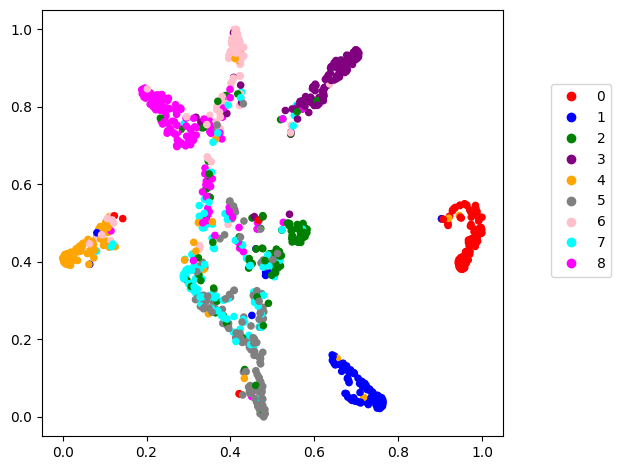



________________________________________________________________________


simsiam





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 20s 108ms/step - loss: 1.1476 - Accuracy: 0.5744 - F1_score: 0.5567 - Precision: 0.8340 - R2 score: 0.3960 - Recall: 0.3601 - Top 5 Accuracy: 0.9561 - Top 3 Accuracy: 0.8579 - val_loss: 0.9028 - val_Accuracy: 0.6750 - val_F1_score: 0.6749 - val_Precision: 0.8718 - val_R2 score: 0.5030 - val_Recall: 0.4604 - val_Top 5 Accuracy: 0.9865 - val_Top 3 Accuracy: 0.9427
Epoch 2/30
136/136 [==============================] - 14s 103ms/step - loss: 0.8485 - Accuracy: 0.6911 - F1_score: 0.6780 - Precision: 0.8401 - R2 score: 0.5257 - Recall: 0.5138 - Top 5 Accuracy: 0.9883 - Top 3 Accuracy: 0.9354 - val_loss: 0.8131 - val_Accuracy: 0.7156 - val_F1_score: 0.6969 - val_Precision: 0.8423 - val_R2 score: 0.5569 - val_Recall: 0.5729 - val_Top 5 Accuracy: 0.9885 - val_Top 3 Accuracy: 0.9458
Epoch 3/30
136/136 [==============================] - 14s 103ms/step - loss: 0.7741 - Accuracy: 0.7165 - F1_score: 0.7042 - Precision: 0.8416 - R2 score: 0.5615 - Recall: 0.

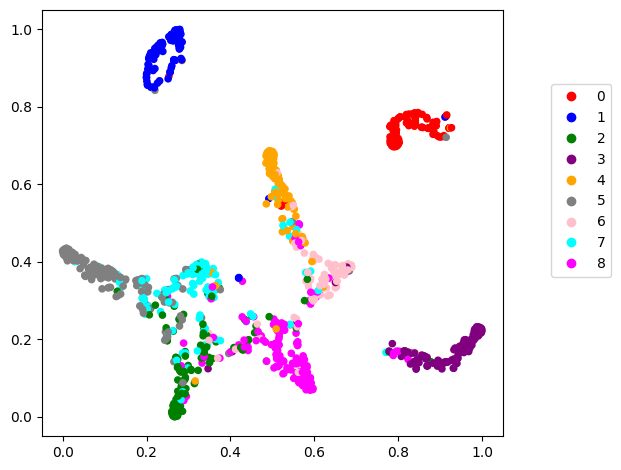



________________________________________________________________________


byol





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 19s 107ms/step - loss: 0.9413 - Accuracy: 0.6657 - F1_score: 0.6564 - Precision: 0.8100 - R2 score: 0.4975 - Recall: 0.5340 - Top 5 Accuracy: 0.9719 - Top 3 Accuracy: 0.8989 - val_loss: 0.7399 - val_Accuracy: 0.7437 - val_F1_score: 0.7462 - val_Precision: 0.8450 - val_R2 score: 0.6036 - val_Recall: 0.6531 - val_Top 5 Accuracy: 0.9896 - val_Top 3 Accuracy: 0.9427
Epoch 2/30
136/136 [==============================] - 13s 95ms/step - loss: 0.6376 - Accuracy: 0.7747 - F1_score: 0.7692 - Precision: 0.8562 - R2 score: 0.6414 - Recall: 0.6847 - Top 5 Accuracy: 0.9932 - Top 3 Accuracy: 0.9617 - val_loss: 0.6345 - val_Accuracy: 0.7750 - val_F1_score: 0.7787 - val_Precision: 0.8508 - val_R2 score: 0.6535 - val_Recall: 0.7010 - val_Top 5 Accuracy: 0.9917 - val_Top 3 Accuracy: 0.9573
Epoch 3/30
136/136 [==============================] - 14s 105ms/step - loss: 0.5740 - Accuracy: 0.7948 - F1_score: 0.7913 - Precision: 0.8659 - R2 score: 0.6753 - Recall: 0.7

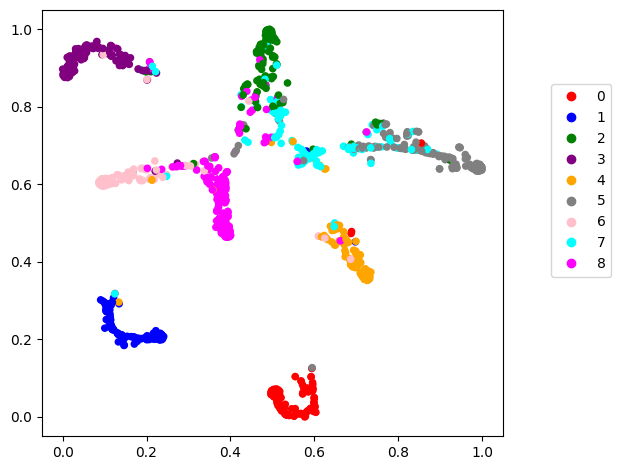



________________________________________________________________________


pnnclr





______________________________
Hyper parameter...
 n =  9  l =  0.001  l1 =  0.001  epochs =  30  size =  32  input_shape =  (96, 96, 3)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


136/136 [==============================] - 21s 110ms/step - loss: 0.8709 - Accuracy: 0.6878 - F1_score: 0.6837 - Precision: 0.8349 - R2 score: 0.5308 - Recall: 0.5582 - Top 5 Accuracy: 0.9755 - Top 3 Accuracy: 0.9165 - val_loss: 0.7318 - val_Accuracy: 0.7281 - val_F1_score: 0.7184 - val_Precision: 0.8176 - val_R2 score: 0.5995 - val_Recall: 0.6677 - val_Top 5 Accuracy: 0.9958 - val_Top 3 Accuracy: 0.9406
Epoch 2/30
136/136 [==============================] - 15s 107ms/step - loss: 0.6136 - Accuracy: 0.7842 - F1_score: 0.7795 - Precision: 0.8578 - R2 score: 0.6534 - Recall: 0.6992 - Top 5 Accuracy: 0.9938 - Top 3 Accuracy: 0.9630 - val_loss: 0.6235 - val_Accuracy: 0.7656 - val_F1_score: 0.7619 - val_Precision: 0.8457 - val_R2 score: 0.6531 - val_Recall: 0.7021 - val_Top 5 Accuracy: 0.9927 - val_Top 3 Accuracy: 0.9615
Epoch 3/30
136/136 [==============================] - 15s 107ms/step - loss: 0.5515 - Accuracy: 0.8006 - F1_score: 0.7977 - Precision: 0.8643 - R2 score: 0.6840 - Recall: 0.

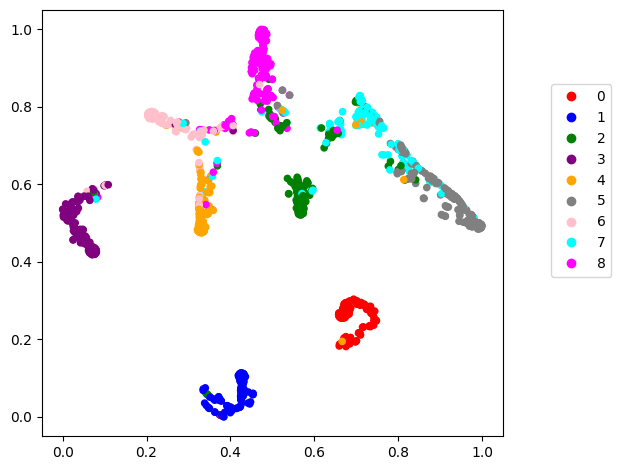

In [ ]:
main2("pathmnist")